In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Delhi

In [40]:
file_path = r"C:\Users\surajs\Desktop\Sarki files\Temperature data\Delhi.csv"
df = pd.read_csv(file_path)

In [41]:
df

,_id,Date,Rain,Temp Max,Temp Min
0,1,1951-01-01T00:00:00,0.0,20.139999,3.680000
1,2,1951-02-01T00:00:00,0.0,21.680000,3.600000
2,3,1951-03-01T00:00:00,0.0,21.280001,3.510000
3,4,1951-04-01T00:00:00,0.0,21.610001,4.090000
4,5,1951-05-01T00:00:00,0.0,21.389999,5.100000
...,...,...,...,...,...
25495,25496,2020-10-20T00:00:00,0.0,34.346905,15.882444
25496,25497,2020-10-21T00:00:00,0.0,34.501602,16.169853
25497,25498,2020-10-22T00:00:00,0.0,33.592392,17.417950
25498,25499,2020-10-23T00:00:00,0.0,33.836754,16.046686


In [42]:
df.drop(['_id'], inplace=True, axis = 1)

# Monthly

In [181]:
file_path = r"C:\Users\surajs\Desktop\Sarki files\Temperature data\Hyderabad.csv"
df = pd.read_csv(file_path)
df

,_id,Date,Rain,Temp Max,Temp Min
0,1,1951-01-01T00:00:00,0.000000,28.940001,15.580000
1,2,1951-02-01T00:00:00,0.000000,27.889999,13.860000
2,3,1951-03-01T00:00:00,0.000000,27.320000,12.380000
3,4,1951-04-01T00:00:00,0.000000,27.670000,13.060000
4,5,1951-05-01T00:00:00,0.000000,28.320000,14.790000
...,...,...,...,...,...
25495,25496,2020-10-20T00:00:00,9.135952,30.760349,22.636747
25496,25497,2020-10-21T00:00:00,10.907142,30.249527,22.250582
25497,25498,2020-10-22T00:00:00,0.000000,31.493406,21.756905
25498,25499,2020-10-23T00:00:00,0.000000,32.115795,20.764082


In [182]:
df.drop(['_id'], inplace=True, axis = 1)

In [193]:
# df1 = df[(df['Date'] >= '2001-01-01') & (df['Date'] < '2021-01-01')]
df1 = df[(df['Date'] >= '2010-01-01') & (df['Date'] < '2021-01-01')]

In [194]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

C:\Users\surajs\AppData\Local\Temp\ipykernel_13688\3597432312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')


In [195]:
df1 = df1.sort_values(by='Date').reset_index(drop=True)

In [196]:
df1

,Date,Rain,Temp Max,Temp Min
0,2010-01-01,0.000000,29.690001,16.400000
1,2010-01-02,0.000000,31.030001,14.590000
2,2010-01-03,0.000000,36.740002,19.660000
3,2010-01-04,0.000000,39.470001,23.070000
4,2010-01-05,1.392317,38.290001,25.940001
...,...,...,...,...
3945,2020-12-06,17.334538,31.343243,22.678347
3946,2020-12-07,6.601609,31.912903,23.713648
3947,2020-12-08,0.000000,28.663137,23.231480
3948,2020-12-09,34.588238,31.290668,22.654434


Average Max min Temperature Monthly

In [197]:
df1['Month'] = df1['Date'].dt.month    

In [198]:
df1

,Date,Rain,Temp Max,Temp Min,Month
0,2010-01-01,0.000000,29.690001,16.400000,1
1,2010-01-02,0.000000,31.030001,14.590000,1
2,2010-01-03,0.000000,36.740002,19.660000,1
3,2010-01-04,0.000000,39.470001,23.070000,1
4,2010-01-05,1.392317,38.290001,25.940001,1
...,...,...,...,...,...
3945,2020-12-06,17.334538,31.343243,22.678347,12
3946,2020-12-07,6.601609,31.912903,23.713648,12
3947,2020-12-08,0.000000,28.663137,23.231480,12
3948,2020-12-09,34.588238,31.290668,22.654434,12


In [199]:
# monthly_avg = df1.groupby('Month')[['Temp Max', 'Temp Min']].std()
monthly_stats = df1.groupby('Month')[['Temp Max', 'Temp Min']].agg(['mean', 'std'])

In [200]:
monthly_stats.reset_index(inplace=True)
print(monthly_stats)

   Month   Temp Max             Temp Min          
               mean       std       mean       std
0      1  31.863610  3.112890  17.962624  3.932983
1      2  33.882561  2.940653  20.010236  2.915312
2      3  36.137076  3.333789  22.144748  2.423180
3      4  37.434365  4.120803  23.757647  3.146287
4      5  38.450810  4.613590  25.037137  3.721870
5      6  33.981689  3.084434  23.108585  2.768626
6      7  32.169284  3.212450  22.446064  2.497842
7      8  31.937945  3.139792  22.219313  2.401614
8      9  32.332825  2.927622  22.135744  2.437036
9     10  32.737849  2.805327  21.003240  2.674863
10    11  32.201638  2.860928  19.361204  3.375679
11    12  31.352659  3.304789  17.784154  4.205854


In [201]:
# pip install openpyxl

In [202]:
output_location = r"C:\Users\surajs\Desktop\Sarki files\Temperature data\output\hyd_mon_sts_2010-2020.xlsx"
monthly_stats.to_excel(output_location)
print(f"Monthly sts saved successfully to: {output_location}")

Monthly sts saved successfully to: C:\Users\surajs\Desktop\Sarki files\Temperature data\output\hyd_mon_sts_2010-2020.xlsx


# Weekly

In [323]:
file_path = r"C:\Users\surajs\Desktop\Sarki files\Temperature data\Mumbai.csv"
df = pd.read_csv(file_path)
df

,_id,Date,Rain,Temp Max,Temp Min
0,1,1951-01-01T00:00:00,NaN,28.530001,14.540000
1,2,1951-02-01T00:00:00,NaN,28.850000,14.480000
2,3,1951-03-01T00:00:00,NaN,30.660000,14.430000
3,4,1951-04-01T00:00:00,NaN,30.139999,14.360000
4,5,1951-05-01T00:00:00,NaN,29.180000,13.340000
...,...,...,...,...,...
25495,25496,2020-10-20T00:00:00,NaN,32.538624,24.815601
25496,25497,2020-10-21T00:00:00,NaN,32.918869,24.005579
25497,25498,2020-10-22T00:00:00,NaN,33.161041,24.473551
25498,25499,2020-10-23T00:00:00,NaN,33.321506,23.733984


In [324]:
df.drop(['_id'], inplace=True, axis = 1)

In [325]:
# df1 = df[(df['Date'] >= '2001-01-01') & (df['Date'] < '2021-01-01')]
df1 = df[(df['Date'] >= '2010-01-01') & (df['Date'] < '2021-01-01')]

In [326]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1 = df1.sort_values(by='Date').reset_index(drop=True)

C:\Users\surajs\AppData\Local\Temp\ipykernel_13688\1463647119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')


In [327]:
df1

,Date,Rain,Temp Max,Temp Min
0,2010-01-01,NaN,30.990000,16.480000
1,2010-01-02,NaN,30.510000,16.150000
2,2010-01-03,NaN,34.160000,19.389999
3,2010-01-04,NaN,34.180000,20.930000
4,2010-01-05,NaN,36.630001,25.100000
...,...,...,...,...
3945,2020-12-06,NaN,32.635536,25.126841
3946,2020-12-07,NaN,30.386822,24.411619
3947,2020-12-08,NaN,27.977999,24.280624
3948,2020-12-09,NaN,31.080711,24.191410


In [328]:
df1['Week'] = df1['Date'].dt.isocalendar().week
df1

,Date,Rain,Temp Max,Temp Min,Week
0,2010-01-01,NaN,30.990000,16.480000,53
1,2010-01-02,NaN,30.510000,16.150000,53
2,2010-01-03,NaN,34.160000,19.389999,53
3,2010-01-04,NaN,34.180000,20.930000,1
4,2010-01-05,NaN,36.630001,25.100000,1
...,...,...,...,...,...
3945,2020-12-06,NaN,32.635536,25.126841,49
3946,2020-12-07,NaN,30.386822,24.411619,50
3947,2020-12-08,NaN,27.977999,24.280624,50
3948,2020-12-09,NaN,31.080711,24.191410,50


In [329]:
# Group by Week and calculate mean and standard deviation for Temp Max and Temp Min
weekly_stats = df1.groupby('Week')[['Temp Max', 'Temp Min']].agg(['mean', 'std'])

# Reset index for better readability (optional)
weekly_stats.reset_index(inplace=True)

# weekly_stats

In [330]:
output_location = r"C:\Users\surajs\Desktop\Sarki files\Temperature data\output\Mumb_week_sts_2010-2020.xlsx"
weekly_stats.to_excel(output_location)
print(f"Weekly sts saved successfully to: {output_location}")

Weekly sts saved successfully to: C:\Users\surajs\Desktop\Sarki files\Temperature data\output\Mumb_week_sts_2010-2020.xlsx


# quarterly

In [392]:
file_path = r"C:\Users\surajs\Desktop\Sarki files\Temperature data\Mumbai.csv"
df = pd.read_csv(file_path)
df.drop(['_id'], inplace=True, axis = 1)

In [393]:
# df1 = df[(df['Date'] >= '2001-01-01') & (df['Date'] < '2021-01-01')]
df1 = df[(df['Date'] >= '2010-01-01') & (df['Date'] < '2021-01-01')]
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1 = df1.sort_values(by='Date').reset_index(drop=True)
df1['Quarter'] = df1['Date'].dt.quarter

C:\Users\surajs\AppData\Local\Temp\ipykernel_13688\83532784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')


In [394]:
quarterly_stats = df1.groupby('Quarter')[['Temp Max', 'Temp Min']].agg(['mean', 'std'])
# Reset index for better readability (optional)
quarterly_stats.reset_index(inplace=True)

In [395]:
output_location = r"C:\Users\surajs\Desktop\Sarki files\Temperature data\output\Mumb_quarter_sts_2010-2020.xlsx"
quarterly_stats.to_excel(output_location)
print(f"quarter sts saved successfully to: {output_location}")

quarter sts saved successfully to: C:\Users\surajs\Desktop\Sarki files\Temperature data\output\Mumb_quarter_sts_2010-2020.xlsx


# Yeary

In [418]:
file_path = r"C:\Users\surajs\Desktop\Sarki files\Temperature data\Hyderabad.csv"
df = pd.read_csv(file_path)
df.drop(['_id'], inplace=True, axis = 1)

In [419]:
df1 = df[(df['Date'] >= '2001-01-01') & (df['Date'] < '2021-01-01')]
# df1 = df[(df['Date'] >= '2010-01-01') & (df['Date'] < '2021-01-01')]
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1 = df1.sort_values(by='Date').reset_index(drop=True)
df1['Year'] = df1['Date'].dt.year

C:\Users\surajs\AppData\Local\Temp\ipykernel_13688\3733759792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')


In [420]:
# Group by Year and calculate mean and standard deviation for Temp Max and Temp Min
yearly_stats = df1.groupby('Year')[['Temp Max', 'Temp Min']].agg(['mean', 'std'])
# Reset index for better readability (optional)
yearly_stats.reset_index(inplace=True)

output_location = r"C:\Users\surajs\Desktop\Sarki files\Temperature data\output\hyd_yearly_sts_2001-2020.xlsx"
yearly_stats.to_excel(output_location)
print(f"quarter sts saved successfully to: {output_location}")
# print(yearly_stats)

quarter sts saved successfully to: C:\Users\surajs\Desktop\Sarki files\Temperature data\output\hyd_yearly_sts_2001-2020.xlsx


In [160]:
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Quarter'] = df1['Date'].dt.quarter
df1['Day'] = df1['Date'].dt.day

In [161]:
df1

,Date,Rain,Temp Max,Temp Min,Year,Month,Quarter,Day
0,2009-01-01,0.0,19.240000,6.530000,2009,1,1,1
1,2009-01-02,0.0,24.350000,7.830000,2009,1,1,2
2,2009-01-03,0.0,29.580000,10.580000,2009,1,1,3
3,2009-01-04,0.0,35.700001,17.400000,2009,1,1,4
4,2009-01-05,0.0,44.520000,25.180000,2009,1,1,5
...,...,...,...,...,...,...,...,...
4012,2019-12-27,0.0,13.838711,4.032050,2019,12,4,27
4013,2019-12-28,0.0,13.672941,3.204182,2019,12,4,28
4014,2019-12-29,0.0,13.729252,3.615611,2019,12,4,29
4015,2019-12-30,0.0,12.427214,3.760080,2019,12,4,30


In [162]:
# # Monthly Mean
monthly_mean = df1.groupby(['Year', 'Month'])[['Temp Max', 'Temp Min']].mean()

In [163]:
monthly_mean

Temp Max   Temp Min
Year Month                      
2009 1      26.928064  13.049677
     2      29.770000  14.462857
     3      32.536129  17.161613
     4      37.264667  21.223000
     5      37.436129  23.162581
...               ...        ...
2019 8      33.299537  23.016200
     9      32.734478  22.105506
     10     32.351170  18.283823
     11     29.013828  15.938607
     12     21.887501  11.422129

[132 rows x 2 columns]

             Temp Max   Temp Min       Date
Year Month                                 
2009 1      26.928064  13.049677 2009-01-01
     2      29.770000  14.462857 2009-02-01
     3      32.536129  17.161613 2009-03-01
     4      37.264667  21.223000 2009-04-01
     5      37.436129  23.162581 2009-05-01
...               ...        ...        ...
2019 8      33.299537  23.016200 2019-08-01
     9      32.734478  22.105506 2019-09-01
     10     32.351170  18.283823 2019-10-01
     11     29.013828  15.938607 2019-11-01
     12     21.887501  11.422129 2019-12-01

[132 rows x 3 columns]


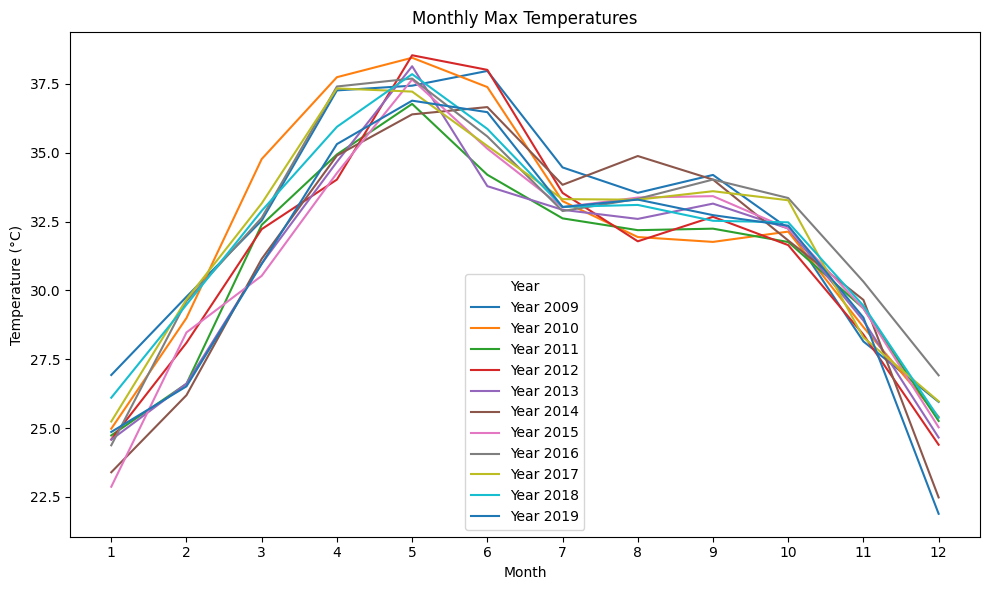

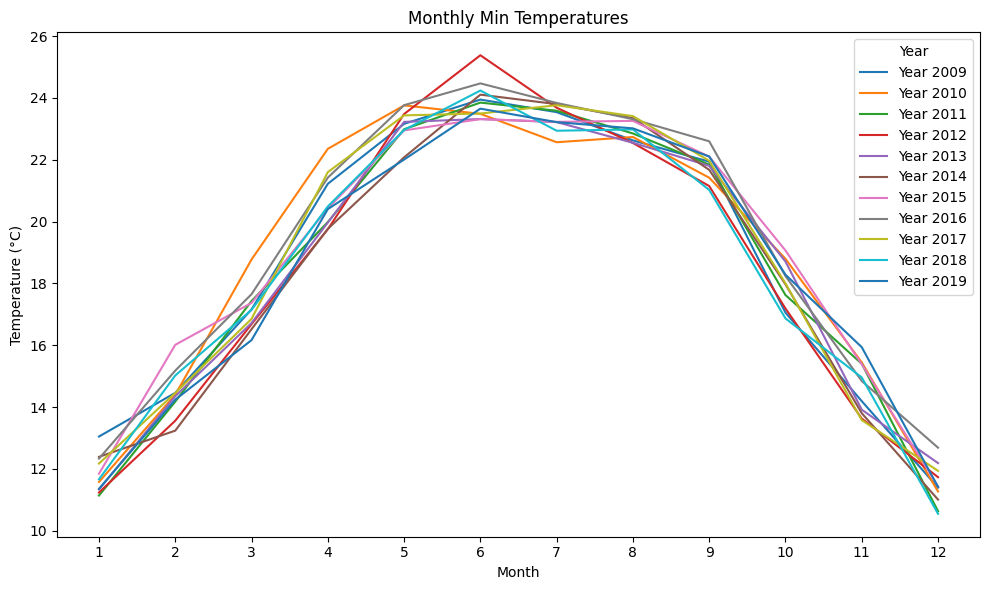

In [164]:
monthly_mean['Date'] = pd.to_datetime(monthly_mean.index.map(lambda x: f'{x[0]}-{x[1]:02d}-01'))
print(monthly_mean)
plt.figure(figsize=(10, 6))

# Loop through each year in the data
for year in monthly_mean.index.get_level_values('Year').unique():
    # Filter data for each year
    year_data = monthly_mean.xs(year, level='Year')
    
    # Plot Temp Max for this year
    plt.plot(year_data['Date'].dt.month, year_data['Temp Max'], label=f'Year {year}')

# Customize the plot
plt.title('Monthly Max Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(title="Year")
plt.xticks(range(1, 13)) 
plt.tight_layout()
plt.show()

# Now, set up the plot for Temp Min
plt.figure(figsize=(10, 6))
for year in monthly_mean.index.get_level_values('Year').unique():
    year_data = monthly_mean.xs(year, level='Year')
    plt.plot(year_data['Date'].dt.month, year_data['Temp Min'], label=f'Year {year}')

# Customize the plot
plt.title('Monthly Min Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(title="Year")
# plt.grid(True)
plt.xticks(range(1, 13))  # For months (1 to 12)
plt.tight_layout()
plt.show()


In [165]:
# # Quarterly Mean
quarterly_mean = df1.groupby(['Year', 'Quarter'])[['Temp Max', 'Temp Min']].mean()


In [166]:
quarterly_mean

Temp Max   Temp Min
Year Quarter                      
2009 1        29.743889  14.905667
     2        37.556044  22.781648
     3        34.067717  22.710761
     4        28.792391  14.216087
2010 1        29.602111  14.936000
     2        37.866484  23.205714
     3        32.320761  22.250761
     4        28.738261  15.169022
2011 1        27.951889  14.253556
     2        35.320659  22.281868
     3        32.350761  22.770435
     4        28.782935  14.544891
2012 1        28.308681  13.834176
     2        36.877582  22.877802
     3        32.666304  22.473261
     4        28.142500  14.191413
2013 1        27.415889  14.129889
     2        35.561209  22.182308
     3        32.890000  22.532174
     4        28.598804  14.950109
2014 1        26.935387  14.078807
     2        35.987826  21.984744
     3        34.249928  22.953643
     4        27.965966  14.267190
2015 1        27.252291  15.046716
     2        35.712040  22.239176
     3        33.270349  22.870825
     4        28.868706  15.295532
2016 1        28.858829  15.054339
     2        36.906692  23.225866
     3        33.404886  23.256071
     4        30.195692  15.262383
2017 1        29.347189  14.497802
     2        36.609049  22.850588
     3        33.402642  23.059906
     4        29.190244  14.518396
2018 1        29.493471  14.598453
     2        36.568723  22.569125
     3        32.893873  22.329260
     4        29.093752  14.117767
2019 1        27.477351  13.912126
     2        36.233966  22.021656
     3        33.024345  22.787127
     4        27.737105  15.198946

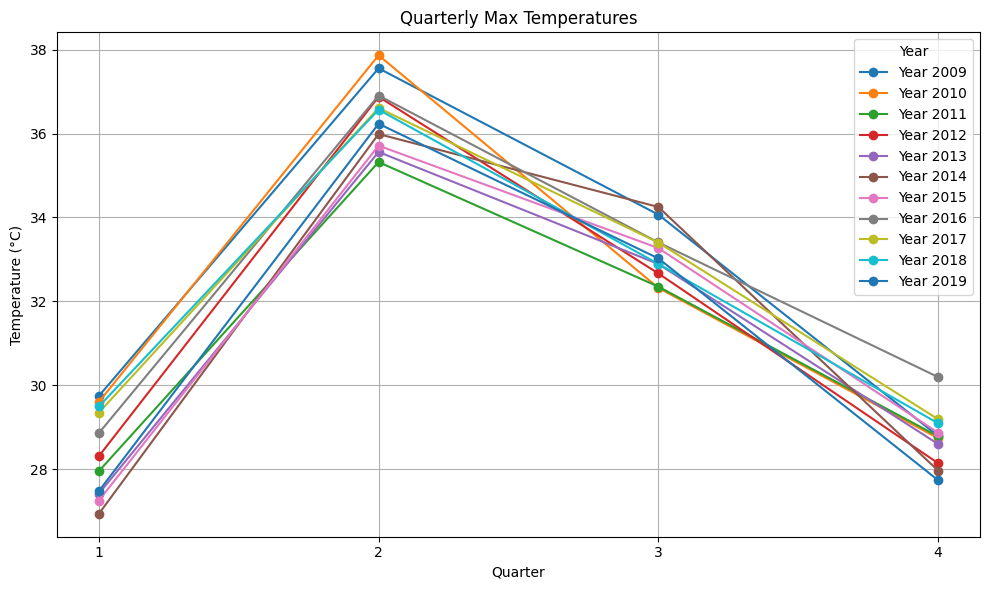

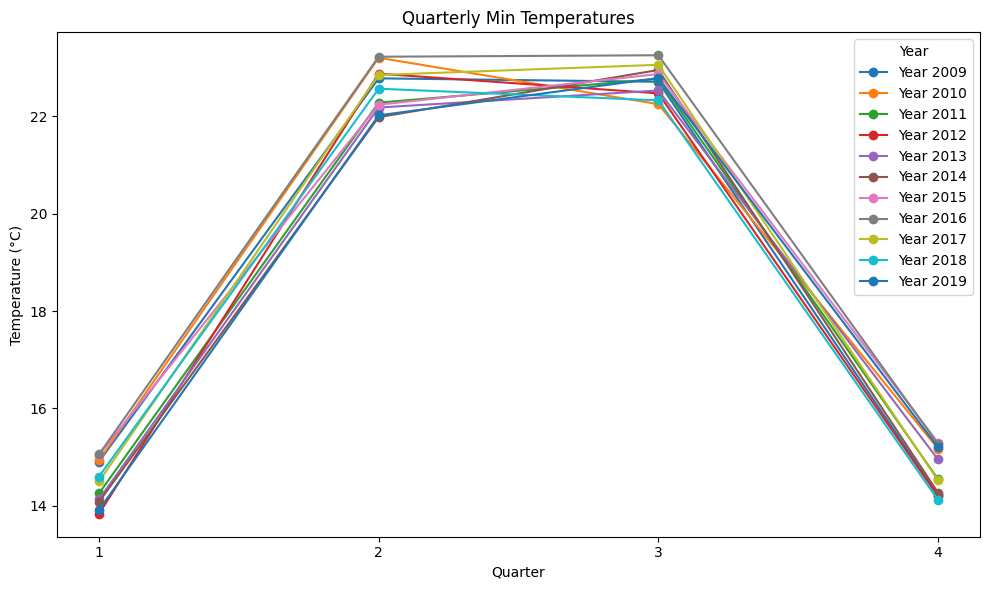

In [167]:
plt.figure(figsize=(10, 6))

# Loop through each year in the data to plot lines for Temp Max
for year in quarterly_mean.index.get_level_values('Year').unique():
    # Filter data for each year
    year_data = quarterly_mean.xs(year, level='Year')
    
    # Plot Temp Max for this year
    plt.plot(year_data.index, year_data['Temp Max'], marker='o', label=f'Year {year}')

# Customize the plot
plt.title('Quarterly Max Temperatures')
plt.xlabel('Quarter')
plt.ylabel('Temperature (°C)')
plt.legend(title="Year")
plt.grid(True)
plt.xticks([1, 2, 3, 4])  # For quarters (1 to 4)
plt.tight_layout()

# Display the plot for Temp Max
plt.show()

# Now, set up the plot for Temp Min
plt.figure(figsize=(10, 6))

# Loop through each year in the data to plot lines for Temp Min
for year in quarterly_mean.index.get_level_values('Year').unique():
    # Filter data for each year
    year_data = quarterly_mean.xs(year, level='Year')
    
    # Plot Temp Min for this year
    plt.plot(year_data.index, year_data['Temp Min'], marker='o', label=f'Year {year}')

# Customize the plot
plt.title('Quarterly Min Temperatures')
plt.xlabel('Quarter')
plt.ylabel('Temperature (°C)')
plt.legend(title="Year")
# plt.grid(True)
plt.xticks([1, 2, 3, 4])  # For quarters (1 to 4)
plt.tight_layout()

# Display the plot for Temp Min
plt.show()

In [168]:
# # Yearly Mean
yearly_mean = df1.groupby('Year')[['Temp Max', 'Temp Min']].mean()

In [169]:
yearly_mean

,Temp Max,Temp Min
Year,,
2009,32.541589,18.662767
2010,32.130055,18.900219
2011,31.107260,18.475288
2012,31.492787,18.344098
2013,31.124575,18.462055
2014,31.295724,18.334304
2015,31.285739,18.874724
2016,32.338567,19.199990
2017,32.140318,18.743588


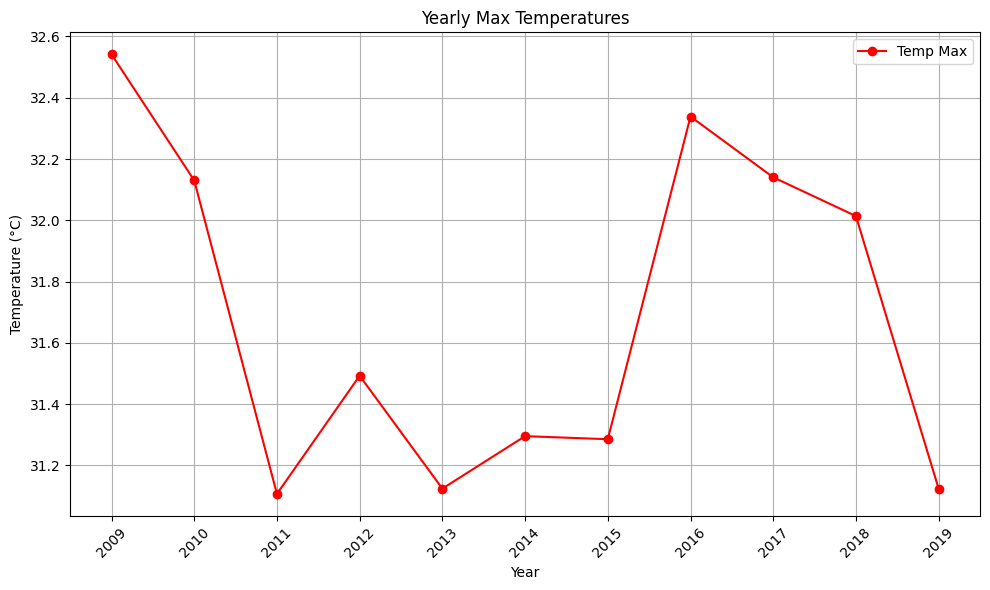

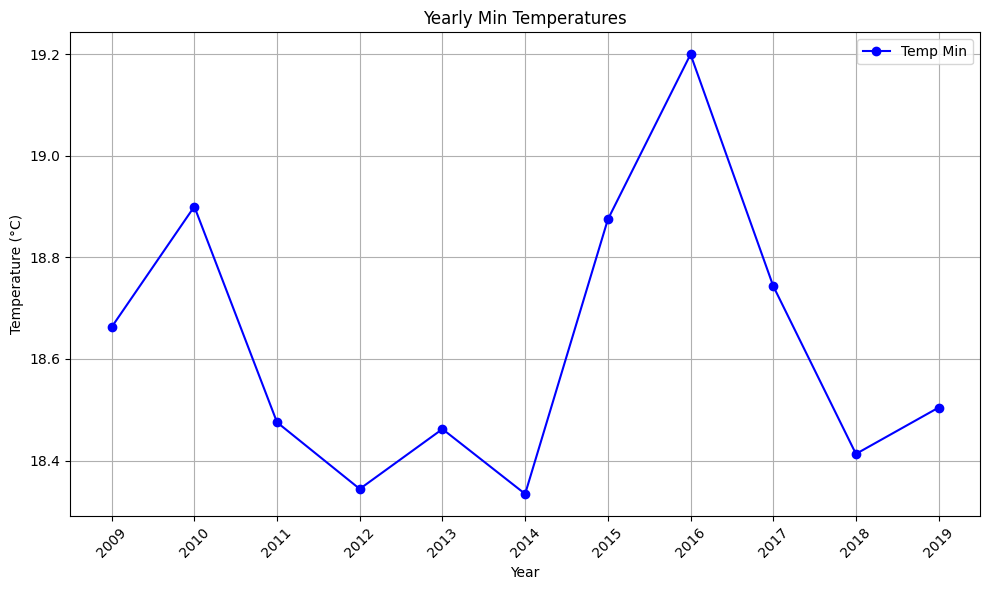

In [170]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean.index, yearly_mean['Temp Max'], marker='o', label='Temp Max', color='red')
plt.title('Yearly Max Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(yearly_mean.index, rotation=45)  # Rotate x-axis labels for clarity
plt.legend()
plt.tight_layout()
plt.show()

# Plot Temp Min
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean.index, yearly_mean['Temp Min'], marker='o', label='Temp Min', color='blue')
plt.title('Yearly Min Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(yearly_mean.index, rotation=45)  # Rotate x-axis labels for clarity
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df1

,Date,Rain,Temp Max,Temp Min,Year,Month,Quarter,Day
0,2009-01-01,0.0,19.240000,6.530000,2009,1,1,1
1,2009-01-02,0.0,24.350000,7.830000,2009,1,1,2
2,2009-01-03,0.0,29.580000,10.580000,2009,1,1,3
3,2009-01-04,0.0,35.700001,17.400000,2009,1,1,4
4,2009-01-05,0.0,44.520000,25.180000,2009,1,1,5
...,...,...,...,...,...,...,...,...
4012,2019-12-27,0.0,13.838711,4.032050,2019,12,4,27
4013,2019-12-28,0.0,13.672941,3.204182,2019,12,4,28
4014,2019-12-29,0.0,13.729252,3.615611,2019,12,4,29
4015,2019-12-30,0.0,12.427214,3.760080,2019,12,4,30


In [198]:
# TEMPERATURE RANGE

df1['Temp Range'] = df1['Temp Max'] - df1['Temp Min']
df1

,Date,Rain,Temp Max,Temp Min,Year,Month,Quarter,Day,Temp Range
0,2009-01-01,0.0,19.240000,6.530000,2009,1,1,1,12.710000
1,2009-01-02,0.0,24.350000,7.830000,2009,1,1,2,16.520000
2,2009-01-03,0.0,29.580000,10.580000,2009,1,1,3,19.000000
3,2009-01-04,0.0,35.700001,17.400000,2009,1,1,4,18.300001
4,2009-01-05,0.0,44.520000,25.180000,2009,1,1,5,19.340000
...,...,...,...,...,...,...,...,...,...
4012,2019-12-27,0.0,13.838711,4.032050,2019,12,4,27,9.806661
4013,2019-12-28,0.0,13.672941,3.204182,2019,12,4,28,10.468759
4014,2019-12-29,0.0,13.729252,3.615611,2019,12,4,29,10.113641
4015,2019-12-30,0.0,12.427214,3.760080,2019,12,4,30,8.667134


In [ ]:
# IF I WANT TO GET THE MEAN VALUE FOR THE DAY ACROSS THE YEAR 

In [201]:
# Group by 'Month' and 'Day' and calculate the mean of Temp Max and Temp Min
mean_temp_per_day = df1.groupby(['Month', 'Day'])[['Temp Max', 'Temp Min']].mean().reset_index()
mean_temp_per_day

,Month,Day,Temp Max,Temp Min
0,1,1,19.166311,7.069270
1,1,2,22.577019,7.936674
2,1,3,26.455661,12.456561
3,1,4,35.933087,18.575449
4,1,5,40.248265,23.366480
...,...,...,...,...
361,12,27,20.310565,5.602545
362,12,28,20.462631,5.607767
363,12,29,20.250218,6.405977
364,12,30,19.518894,6.450083


In [243]:
mean_temp_per_day

,Month,Day,Temp Max,Temp Min,Date,Week
0,1,1,19.166311,7.069270,2024-01-01,1
1,1,2,22.577019,7.936674,2024-01-02,1
2,1,3,26.455661,12.456561,2024-01-03,1
3,1,4,35.933087,18.575449,2024-01-04,1
4,1,5,40.248265,23.366480,2024-01-05,1
...,...,...,...,...,...,...
361,12,27,20.310565,5.602545,2024-12-27,52
362,12,28,20.462631,5.607767,2024-12-28,53
363,12,29,20.250218,6.405977,2024-12-29,53
364,12,30,19.518894,6.450083,2024-12-30,53


In [246]:
# mean_temp_per_day['Date'] = pd.to_datetime(mean_temp_per_day['Month'].astype(str) + '-' + 
#                                             mean_temp_per_day['Day'].astype(str) + '-2020', 
#                                             format='%m-%d-%Y')

# Step 2: Assign the week number to each date (ISO calendar week)
mean_temp_per_day['Week'] = mean_temp_per_day['Date'].dt.isocalendar().week

# Step 3: Group by 'Week' and calculate the mean of 'Temp Max' and 'Temp Min'
weekly_avg = mean_temp_per_day.groupby('Week')[['Temp Max', 'Temp Min']].mean().reset_index()

# Display the result
weekly_avg.head()

,Week,Temp Max,Temp Min
0,1,28.892457,15.105776
1,2,28.482608,16.404288
2,3,19.345525,7.321365
3,4,20.681625,7.794297
4,5,24.597276,10.162604


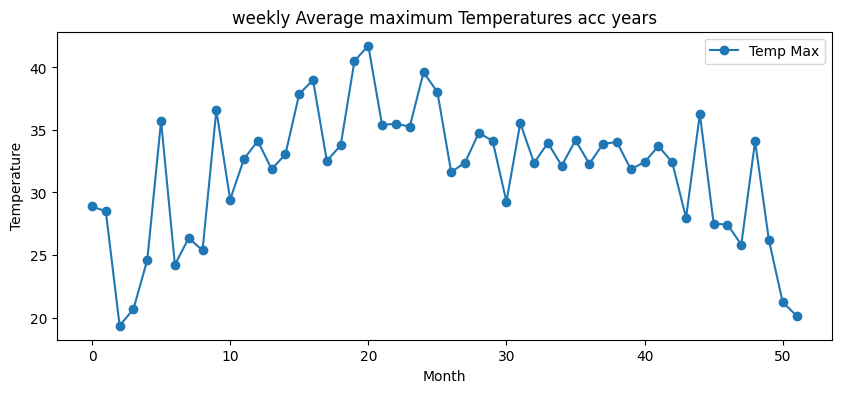

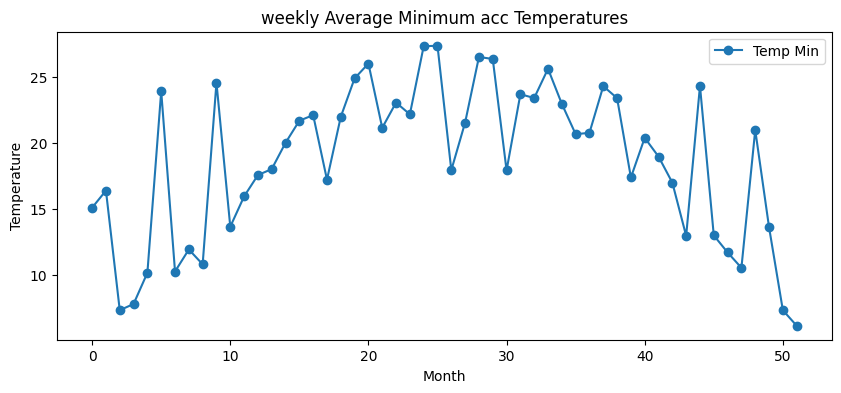

In [248]:
plt.figure(figsize=(10, 4))
plt.plot(weekly_avg.index, weekly_avg['Temp Max'], label='Temp Max', marker='o')
# plt.plot(weekly_avg.index, weekly_avg['Temp Min'], label='Temp Min', marker='o')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('weekly Average maximum Temperatures acc years')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
# plt.plot(weekly_avg.index, weekly_avg['Temp Max'], label='Temp Max', marker='o')
plt.plot(weekly_avg.index, weekly_avg['Temp Min'], label='Temp Min', marker='o')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('weekly Average Minimum acc Temperatures')
plt.legend()
plt.show()

In [224]:
first_days = mean_temp_per_day[mean_temp_per_day['Day'] <= 7]
first_days


,Month,Day,Temp Max,Temp Min
0,1,1,19.166311,7.069270
1,1,2,22.577019,7.936674
2,1,3,26.455661,12.456561
3,1,4,35.933087,18.575449
4,1,5,40.248265,23.366480
...,...,...,...,...
337,12,3,29.247810,13.039722
338,12,4,36.382601,20.055633
339,12,5,39.000826,24.656286
340,12,6,41.150509,27.034763


In [225]:
week_mean = first_days.groupby('Month')[['Temp Max', 'Temp Min']].mean()
week_mean

,Temp Max,Temp Min
Month,,
1,31.601762,17.517721
2,31.582282,17.722869
3,31.626830,18.032334
4,31.870318,18.037487
5,32.216579,18.467507
6,31.836815,18.276295
7,31.627145,17.952658
8,31.619295,17.942218
9,31.952739,17.784826


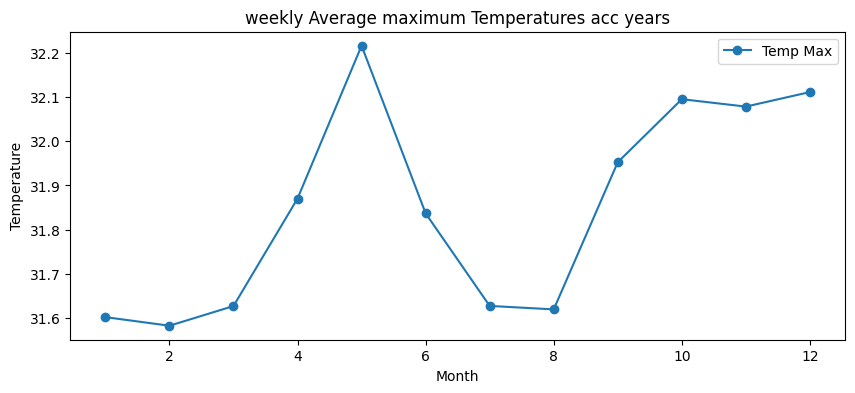

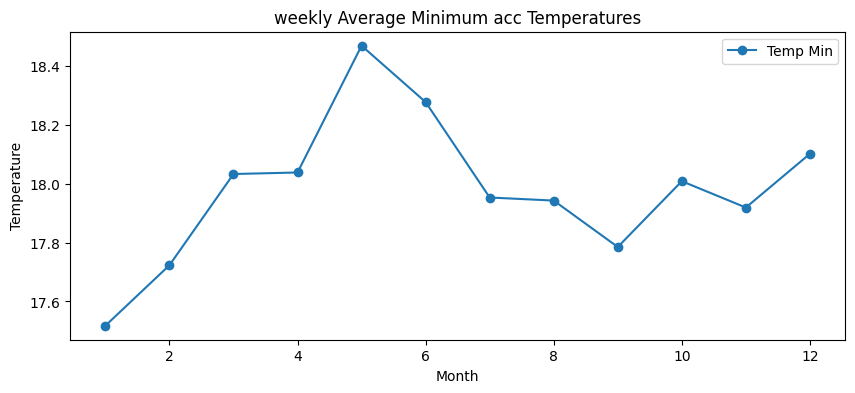

In [234]:
plt.figure(figsize=(10, 4))
plt.plot(week_mean.index, week_mean['Temp Max'], label='Temp Max', marker='o')
# plt.plot(week_mean.index, week_mean['Temp Min'], label='Temp Min', marker='o')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('weekly Average maximum Temperatures acc years')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
# plt.plot(week_mean.index, week_mean['Temp Max'], label='Temp Max', marker='o')
plt.plot(week_mean.index, week_mean['Temp Min'], label='Temp Min', marker='o')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('weekly Average Minimum acc Temperatures')
plt.legend()
plt.show()